### Text classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading dataset

In [2]:
import pandas as pd
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [4]:
s='Hi All Welcome , to Senitiment analysiS class !....'
s=s.lower()
s

'hi all welcome , to senitiment analysis class !....'

In [5]:
import re
pre=re.sub("[^a-z ]",'',s).strip()
pre

'hi all welcome  to senitiment analysis class'

### Create a text preprocessing function

In [6]:
def preprocess_text(st):
    st=st.lower()
    pre=re.sub("[^a-z ]",'', st).strip()
    return pre

In [7]:
preprocess_text('Welcome All! TO ELthive !....')

'welcome all to elthive'

### Preprocess entire data in dataframe

In [8]:
df['Review_pre']=df['Review'].apply(preprocess_text)

In [9]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Seprate X and Y

In [10]:
X=df['Review_pre']
X

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review_pre, Length: 1000, dtype: object

In [11]:
Y=df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### Create a TFIDF Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
X_pre=tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_pre.shape

(1000, 1831)

### Apply Train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [15]:
xtrain.shape

(800, 1831)

In [16]:
xtest.shape

(200, 1831)

### Create the simple neural network

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [18]:
xtrain.shape[1]

1831

In [19]:
## create the model
model=Sequential()

# Hidden Layer 1
model.add(Dense(256,activation='relu',input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

## Output layer(Binary Classsification -sigmoid)
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)

In [22]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[early_stop],batch_size=8)

Epoch 1/200




80/80 [==============================] - 3s 10ms/step - loss: 0.9839 - accuracy: 0.5500 - val_loss: 0.6858 - val_accuracy: 0.6250
Epoch 2/200
80/80 [==============================] - 0s 6ms/step - loss: 0.7845 - accuracy: 0.5984 - val_loss: 0.6720 - val_accuracy: 0.6875
Epoch 3/200
80/80 [==============================] - 1s 7ms/step - loss: 0.5819 - accuracy: 0.7266 - val_loss: 0.6474 - val_accuracy: 0.7437
Epoch 4/200
80/80 [==============================] - 1s 7ms/step - loss: 0.4357 - accuracy: 0.7859 - val_loss: 0.6142 - val_accuracy: 0.7312
Epoch 5/200
80/80 [==============================] - 1s 7ms/step - loss: 0.3984 - accuracy: 0.8422 - val_loss: 0.5855 - val_accuracy: 0.7250
Epoch 6/200
80/80 [==============================] - 1s 7ms/step - loss: 0.2993 - accuracy: 0.8641 - val_loss: 0.5422 - val_accuracy: 0.7125
Epoch 7/200
80/80 [==============================] - 1s 7ms/step - loss: 0.2791 - accuracy: 0.8719 - val_loss: 0.5251 - val_accuracy: 0.7063
Epoch 8/200
80/80 [===

### Learning curve

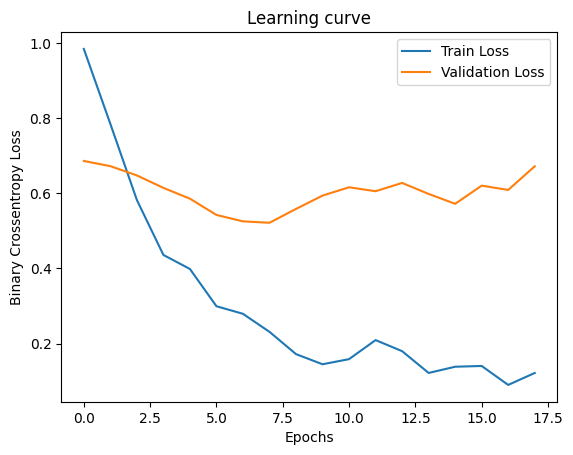

In [23]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

## Note-Bigger dataset size will avoide overfitting here

In [24]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9438


[0.13953612744808197, 0.9437500238418579]

In [25]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 763us/step - loss: 0.8306 - accuracy: 0.7300


[0.8305810689926147, 0.7300000190734863]

### Predict results for train and test

In [26]:
yprob_tr=model.predict(xtrain)
yprob_ts=model.predict(xtest)

7/7 [==============================] - 1s 7ms/step


In [27]:
yprob_tr[0:5]

array([[0.00210671],
       [0.9997722 ],
       [0.00134257],
       [0.00227529],
       [0.99939233]], dtype=float32)

In [28]:
yprob_ts[0:5]

array([[0.01137447],
       [0.9139636 ],
       [0.9575846 ],
       [0.9915044 ],
       [0.8211005 ]], dtype=float32)

### Get the predicitions for train and test

In [29]:
ypred_tr=[1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts=[1 if i>=0.5 else 0 for i in yprob_ts]

In [30]:
ypred_tr[0:5]

[0, 1, 0, 0, 1]

In [31]:
ytrain[0:5]

29     0
535    1
695    0
557    0
836    1
Name: Liked, dtype: int64

In [32]:
ypred_ts[0:5]

[0, 1, 1, 1, 1]

In [33]:
ytest[0:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

### Confusion matrix

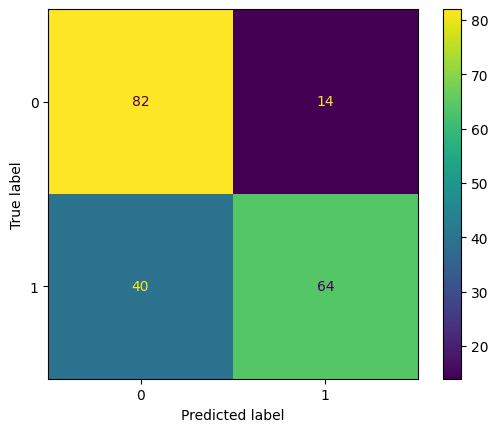

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

## Print classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        96
           1       0.82      0.62      0.70       104

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.73      0.73       200



## Save the model for future use

In [36]:
model.save('Sentiment.keras')

## Predicting own statement based on model

In [37]:
def predict_sentiment(st,tfidf,model):
    pre=preprocess_text(st)
    pre_tf=tfidf.transform([pre]).toarray()
    prob=model.predict(pre_tf)
    if prob>=0.5:
        print('POSITIVE REVIEW')
    else:
        print('Negative review')
    return prob

In [40]:
st='WOW GOOD RESTUARANT!!!...'
predict_sentiment(st,tfidf,model)

1/1 [==============================] - 0s 27ms/step
POSITIVE REVIEW


array([[0.9997862]], dtype=float32)

In [44]:
st="Not taste food!!!!/...."
predict_sentiment(st,tfidf,model)

1/1 [==============================] - 0s 26ms/step
Negative review


array([[0.2793784]], dtype=float32)